centro de massa na possição: x: 612  y: 399 - Area:  22858.0
centro de massa na possição: x: 108  y: 133 - Area:  22854.0
[612, 399, 108, 133]


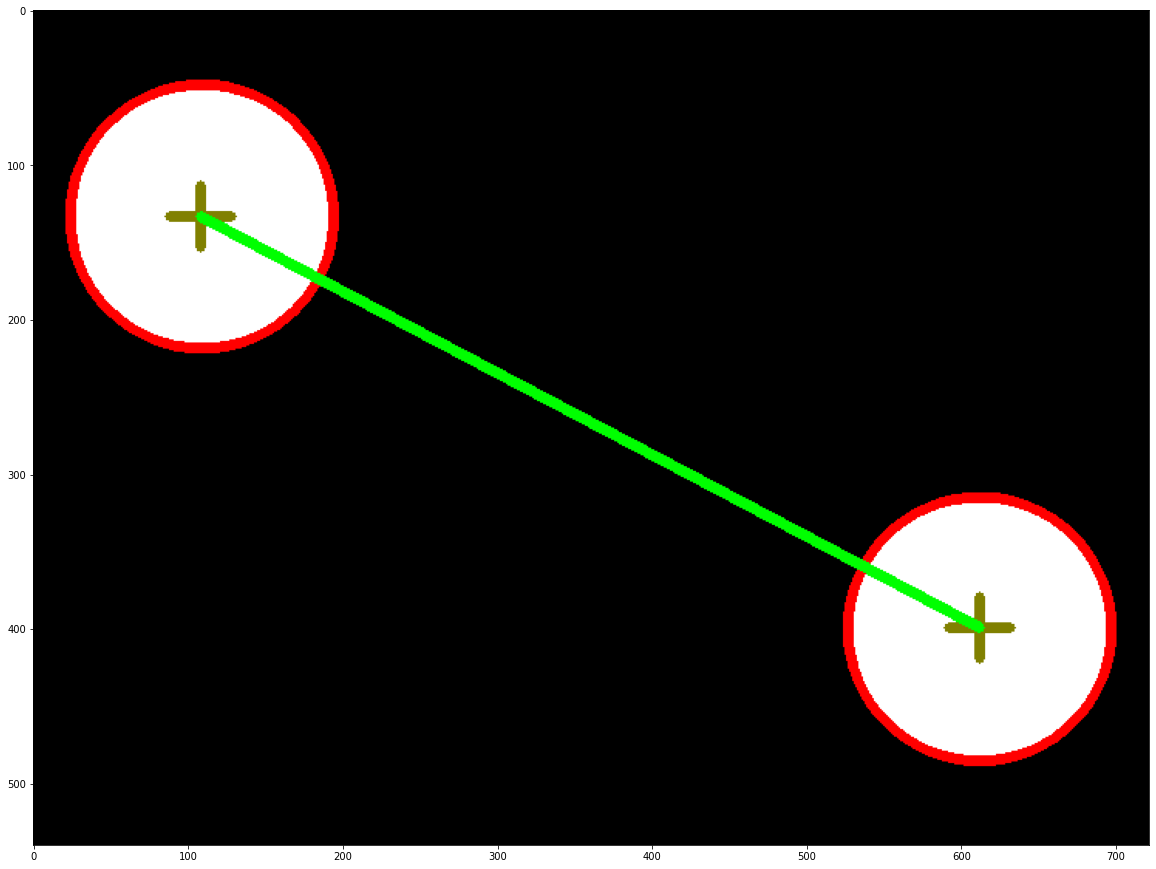

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

image_lower_blue = np.array([50, 50, 50])  
image_upper_blue = np.array([90, 255, 249])

image_lower_reed = np.array([0, 55, 50])  
image_upper_reed = np.array([16, 240, 231])

mask1 = cv2.inRange(img_hsv, image_lower_blue, image_upper_blue)
mask2 = cv2.inRange(img_hsv, image_lower_reed, image_upper_reed)

mask = mask1 + mask2

res = cv2.bitwise_and(img_hsv,img_hsv, mask= mask)


contornos, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy()

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);


size = 20
color = (128,128,0)

# lista_de_contorno = cv2.contourArea(cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE))
# print("areas dos contornos", lista_de_contorno)

coords = []

for cnt in contornos:
    M = cv2.moments(cnt)
    
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    area = cv2.contourArea(cnt)
    if(area >= 22854.0):

      cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
      cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)
      coords.append(cx)
      coords.append(cy)
      print("centro de massa na possição: x:",cx, " y:", cy, "- Area: ", area)

print(coords)
cv2.line(contornos_img, (coords[0],coords[1]),(coords[2],coords[3]), [0, 255, 0], 5)

fig = plt.figure(figsize=(20,20))
plt.imshow(contornos_img)
plt.show()

centro de massa na possição:  455 485
centro de massa na possição:  273 404
centro de massa na possição:  108 399
centro de massa na possição:  612 399
centro de massa na possição:  612 133
centro de massa na possição:  108 133


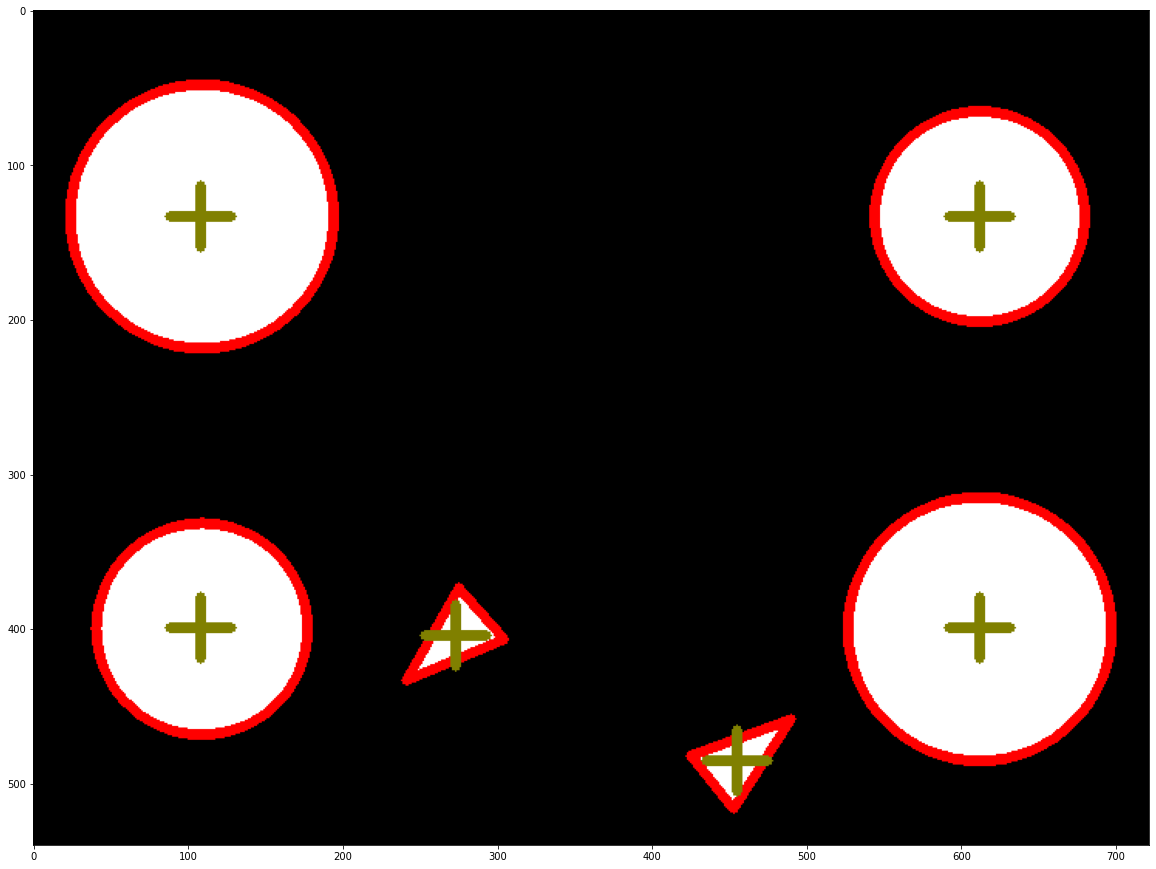

In [2]:
#Implemente seu código

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')

# por padrão a imagem é lida em bgr, mas quero ver ela em rgb, por isso eu converto a imagem
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## quero fazer um filtro na imagem para pegar apenas o que for vermelho, pq quero isso.
### primeira coisa converte para hsv
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o vermelho tem h vai de 0 até 20/2
image_lower_hsv = np.array([0, 50, 100])  
image_upper_hsv = np.array([90, 255, 255])

### aplica a mascara na imagem em hsv
mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);


size = 20
color = (128,128,0)

for cnt in contornos:
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
    cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

    print("centro de massa na possição: ",cx, cy)

fig = plt.figure(figsize=(20,20))

plt.imshow(contornos_img)
plt.show()



3
5


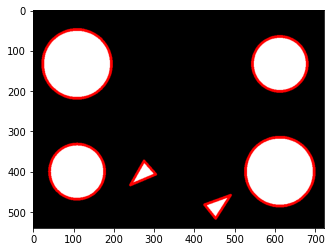

In [3]:
from numpy import true_divide

lista_de_contornos = []
lista_de_contornos_crua = []

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

image_lower_hsv = np.array([0, 50, 100])  
image_upper_hsv = np.array([90, 255, 255])

mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy()

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

for i in range(len(contornos)):
    if(cv2.contourArea(contornos[i]) > 20000):
            lista_de_contornos_crua.append(contornos[i])
            print(i)
            i = i+1

cv2.drawContours(contornos_img, lista_de_contornos_crua, -1, [255, 0, 0], 5);
plt.imshow(contornos_img)
plt.show()


centro de massa na possição: x: 612  y: 399 - Area:  22868.0
centro de massa na possição: x: 108  y: 133 - Area:  22854.0
[612, 399, 108, 133]


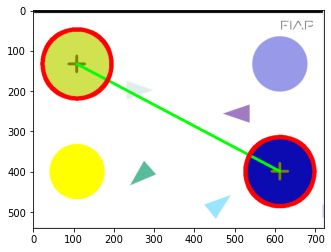

In [11]:

image= cv2.imread('circulo.png')
original_image = image

gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edges= cv2.Canny(gray, 50,200)

contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.destroyAllWindows()


all_areas= []

for cnt in contours:
    area= cv2.contourArea(cnt)
    all_areas.append(area)


sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)


largest_itens = []

largest_itens.append(sorted_contours[0])
largest_itens.append(sorted_contours[1])

coords = []

for cnt in contornos:
    M = cv2.moments(cnt)
    
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    area = cv2.contourArea(cnt)
    if(area >= 22854.0):

      cv2.line(original_image,(cx - size,cy),(cx + size,cy),color,5)
      cv2.line(original_image,(cx,cy - size),(cx, cy + size),color,5)
      coords.append(cx)
      coords.append(cy)
      print("centro de massa na possição: x:",cx, " y:", cy, "- Area: ", area)

print(coords)
cv2.line(original_image, (coords[0],coords[1]),(coords[2],coords[3]), [0, 255, 0], 5)

cv2.drawContours(original_image, largest_itens, -1, (255,0,0),10)
cv2.waitKey(0)
plt.imshow(original_image)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
import math

dx = 612 - 108
dy = 399 - 133
angle = math.atan2(dy,dx)*180 /math.pi
print(angle)

27.82409638425326
